In [2]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import numpy as np
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
#To do Regex
import re
#To do sentiment analysis
from textblob import TextBlob

import matplotlib.pyplot as plt 
import seaborn as sns

## Import data from CSV file to a DataFrame

In [5]:
data_df = pd.read_csv('raw_twitter_data.csv')

## Cleaning up DataFrame

### Adding columns

In [6]:
#Add date column:
data_df['date'] = pd.to_datetime(data_df['created_at']).dt.date

#Add counter columns
find_counts = re.compile(r'\b\d+\b')                                         #Define regex for finding the counts
metrics_list = ['retweet_count', 'reply_count', 'like_count', 'quote_count'] #Define names of the new columns

j=0
for i in metrics_list:
    data_df[i] = [find_counts.findall(i)[j] for i in data_df['public_metrics']]
    j+=1



### Removing columns

In [7]:
drop_columns = ['reply_settings', 'source', 'id', 'conversation_id', 'public_metrics', 'in_reply_to_user_id', 'referenced_tweets', 'lang', 'created_at', 'geo']

clean_df = data_df.drop(drop_columns, axis=1)

### Sample

In [8]:
print(clean_df['text'].sample(1))

56759    @WhalesMetaverse Suki スキ 🐕 @SukiTheDoge\n-The ...
Name: text, dtype: object


## Some initial plotting

In [39]:
tweets_per_day_df = clean_df['text'].groupby(clean_df['date']).count()

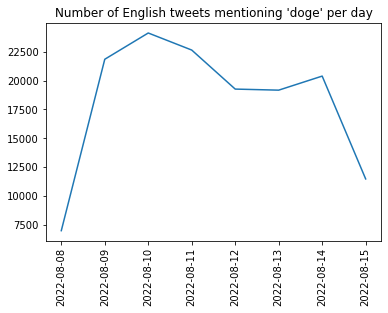

In [40]:
plt.plot(tweets_per_day_df)
plt.title('Number of English tweets mentioning \'doge\' per day')
plt.xticks(rotation=90)

plt.show()

# Sentiment analysis

First we define two functions:
* One that cleans a given tweet for unnecessary stuff, such as mentions etc
* One that uses the TextBlob library's sentiment function to determine a given tweets sentiment

In [41]:
def clean_tweet(tweet):
    '''
    Using RegEx, this function cleans the tweets for unnecessary fluffer
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Uses textblob to decide sentiment of a parsed tweet
    '''
    # Create TextBlob object
    blob = TextBlob(clean_tweet(tweet))
        
    # Set sentiment
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

### Demonstration of the clean_tweet function:

In [47]:
print('Full tweet: \n',clean_df['text'][0], '\n')

print('Cleaned tweet: \n',clean_tweet(clean_df['text'][0]))

Full tweet: 
 @alqsyy @Mutantduckclub8 RYOGE- The shiba killer of BSC. Ryoge Dao embodies true decentralization in the blockchain backed by its utilities that support its purpose. 

@RyogeDao #RyogeDao #BscGem #Bnb #Doge #DAO #Swap #Staking #NFTs #Memecoin #Bullish #Moonshot #100xGem #1000xGem

https://t.co/5MNvikfPse 

Cleaned tweet: 
 RYOGE The shiba killer of BSC Ryoge Dao embodies true decentralization in the blockchain backed by its utilities that support its purpose RyogeDao BscGem Bnb Doge DAO Swap Staking NFTs Memecoin Bullish Moonshot 100xGem 1000xGem


## Adding a sentiment-column

Using list comprehension we use the above defined functions on each tweet text in clean_df

### OBS: the cell takes around 3-5 minutes to run

In [37]:
clean_df['sentiment'] = [get_tweet_sentiment(tweet) for tweet in clean_df['text']]

In [48]:
clean_df.sample(5)

,text,author_id,date,retweet_count,reply_count,like_count,quote_count,sentiment
123822,A awesome cold glass of @PepsiMAX and Alexa pl...,1463170812920299520,2022-08-09,2,1,3,0,positive
24308,Gm love ❤️ Doge https://t.co/y8Irr4RU2V,1489896653670727682,2022-08-14,0,0,2,0,positive
85626,@WhaleEverything Baby doge coin,1487375740358348802,2022-08-11,0,0,0,0,neutral
37852,#البتكوين #البيتكوين #العملات_الرقميه #العملات...,1308426311845777408,2022-08-13,0,0,2,0,neutral
96467,@Doge_cakes Oh don´t you find it strange? Only...,1481318526229094402,2022-08-10,0,0,1,0,negative
